## Week 2: Introduction to Supervised Learning 1
### Goal of this notebook:
The goal of this notebook is to apply K-Nearest Neighbour (KNN) and Bagging Algorithm on the iris dataset. 

In [9]:
from sklearn import datasets
iris_data, iris_labels = datasets.load_iris(return_X_y=True, as_frame=False)
print("The dimensions of the Iris feature matrix", iris_data.shape)
print(iris_data[:5])

The dimensions of the Iris feature matrix (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Explore the dataset
Right, now let's explore the dataset and see the labels and features.

* Read about the Iris dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html
* What type of labels does it have (real continuous or categorical)? What kind of machine learning task is this type of label suited to, i.e. classification or regression?
  * Based on documentation and after inspecting the dataset, it has categorical labels, so classification is more appropriate for this dataset.
* What is the feature dimensionality of the dataset, i.e. the number of features?
  * it has 4 features: Sepal length, Sepal width, Petal length, Petal width
* How many data instances are there? What is the distribution of instances across classes?
  * 150 data instances, distributed equally



---


* Select one of the features. What association does the selected feature have with the iris classes, with respect to differentiating between them (Hint - use a search engine to read about Iris Setosa, Iris Versicolour, and Iris Virginica plant)?
* What factors do you think limited the number of data instances per class?
* How do you think the data was collected? What implication would this have for real world deployment of a model for automatic detection of iris classes based on this dataset?
* How do you think it was labelled? What kind of challenge might this pose for collection of more training data (and labels) for automatic detection of iris classes?

---
Right, now that we have the dataset imported. Let's split it into 50:50 training:test.

In [22]:
import numpy as np
import pandas as pd
random_seed = 94
rng = np.random.default_rng(random_seed)
# add indices to the data
random_inds = np.arange(iris_data.shape[0],)
# shuffle the indices
rng.shuffle(random_inds)
split_point = int(0.5 * iris_labels.shape[0])
# split the indices
training_data = iris_data[random_inds[:split_point], :]
training_labels = iris_labels[random_inds[:split_point]]
testing_data = iris_data[random_inds[split_point:], :]
testing_labels = iris_labels[random_inds[split_point:]]

training_data_df = pd.DataFrame(training_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
testing_data_df = pd.DataFrame(testing_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
print(training_data_df.describe())
print(testing_data_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count     75.000000    75.000000     75.000000    75.000000
mean       5.833333     3.066667      3.804000     1.236000
std        0.760038     0.470001      1.710969     0.731093
min        4.300000     2.000000      1.000000     0.100000
25%        5.200000     2.800000      1.550000     0.400000
50%        5.800000     3.000000      4.500000     1.400000
75%        6.400000     3.300000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000
       sepal_length  sepal_width  petal_length  petal_width
count     75.000000    75.000000     75.000000    75.000000
mean       5.853333     3.048000      3.712000     1.162667
std        0.895987     0.401807      1.828377     0.795388
min        4.400000     2.200000      1.200000     0.100000
25%        5.100000     2.800000      1.600000     0.200000
50%        5.800000     3.000000      4.200000     1.300000
75%        6.400000     3.350000      5.

Perfecto, Now let's use KNN to train and test, then check the accuracy!

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data, training_labels)
predicted_labels = knn.predict(testing_data)
accuracy = accuracy_score(testing_labels, predicted_labels)
print("The accuracy of the classifier is", accuracy)    

The accuracy of the classifier is 0.9866666666666667


Let's explore the differences visually

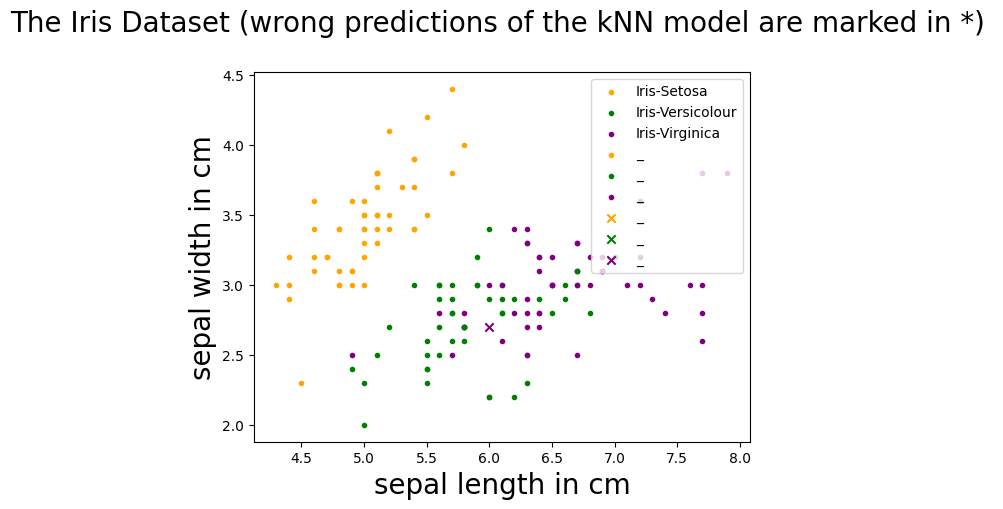

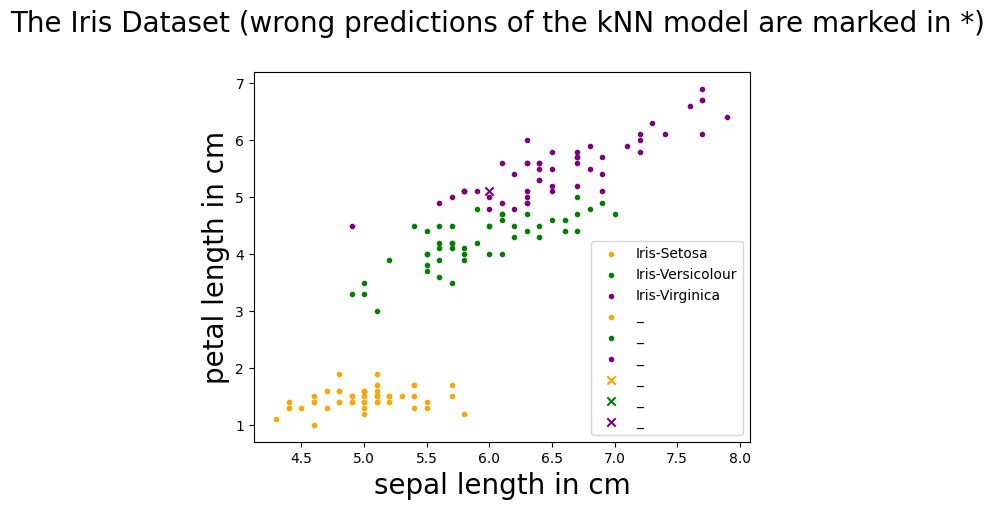

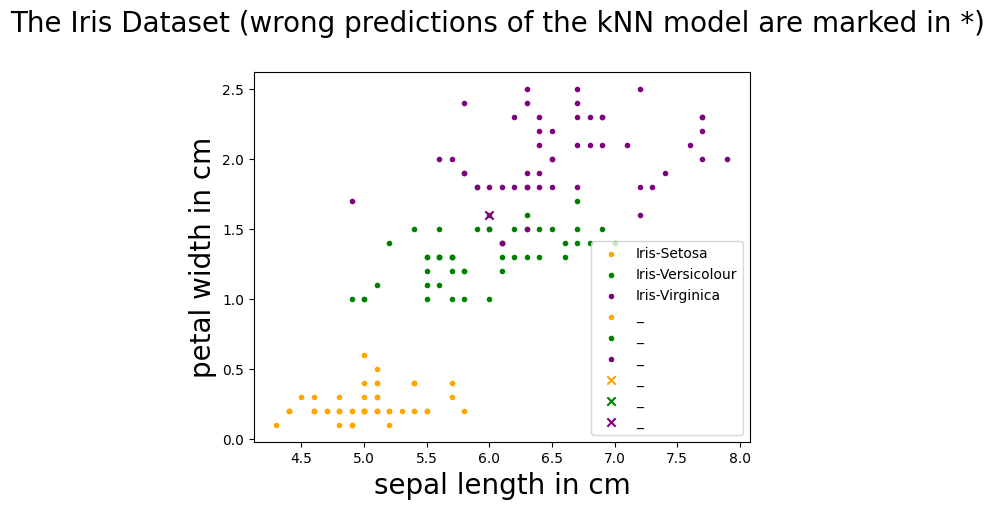

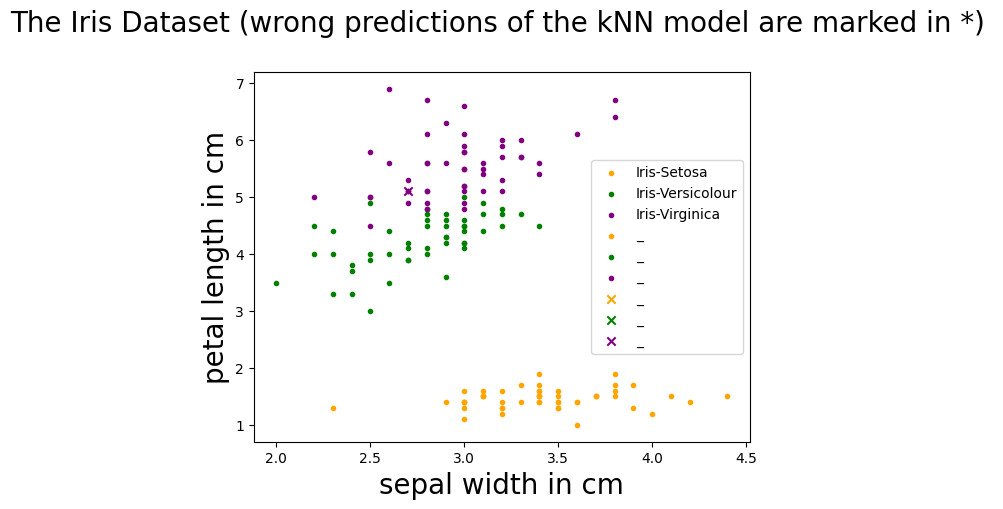

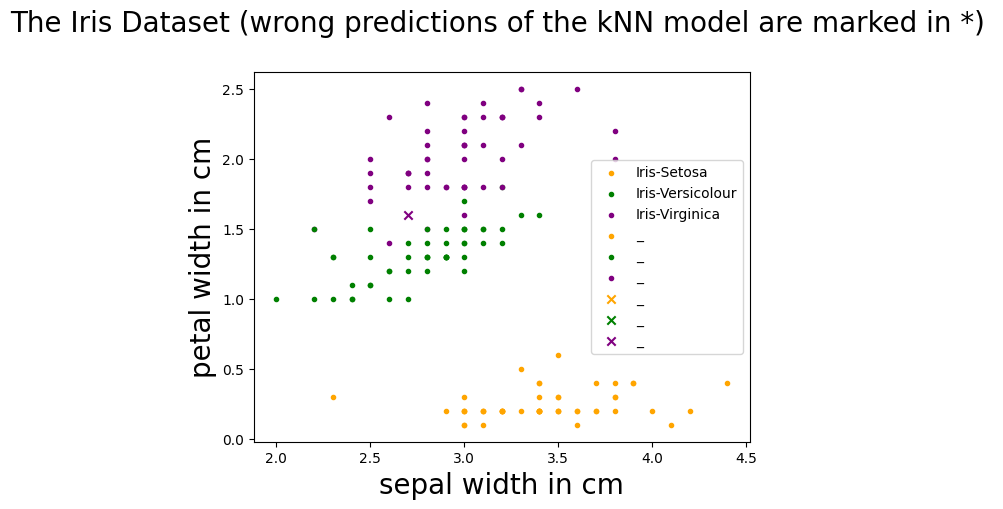

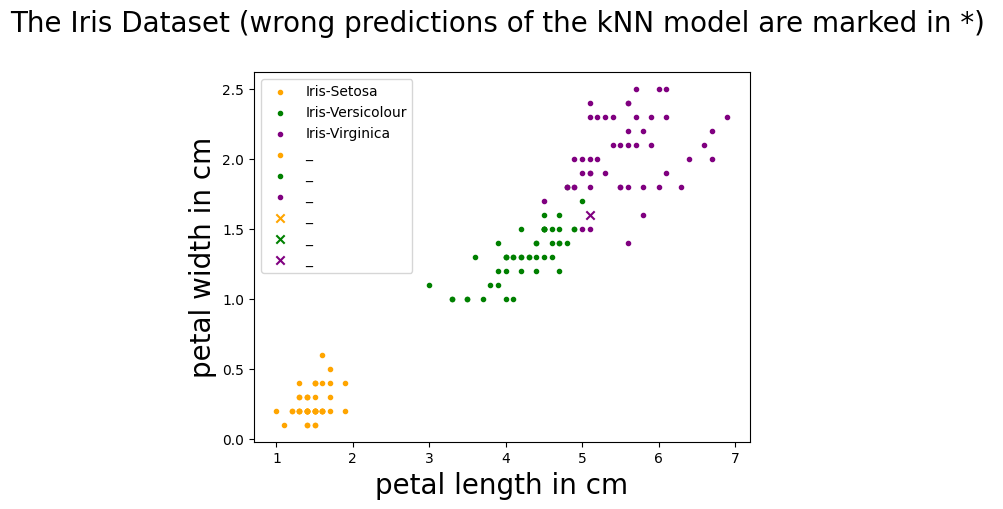

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import warnings


feature_names = ['sepal length in cm', 'sepal width in cm',
                 'petal length in cm', 'petal width in cm']

# Creating a method for plotting the 3 different classes by different colours
def plot_by_class(ax, data1, data2, labels, marker='.'):

  class_0 = labels == 0
  ax.scatter(data1[class_0], data2[class_0], color='orange', marker=marker, label='Iris-Setosa')

  class_1 = labels == 1
  ax.scatter(data1[class_1], data2[class_1], color='green', marker=marker, label='Iris-Versicolour')

  class_2 = labels == 2
  ax.scatter(data1[class_2], data2[class_2], color='purple', marker=marker, label='Iris-Virginica')

  return ax


# Setting up to plot only 2 of the 4 features at a time
# since it is impossible to create a 4D plot
for i in np.arange(0, iris_data.shape[1]):

  for j in np.arange(i, iris_data.shape[1]):


    if i != j:

      fig, ax = plt.subplots()

      # Plotting the training data
      # and colour coding by the labels
      ax = plot_by_class(ax, training_data[:, i], training_data[:, j], training_labels)

      # Plotting the test data
      # and differentiating between correct and incorrect predictions
      incorrect_pred = testing_labels != predicted_labels
      correct_pred = testing_labels == predicted_labels
      ax = plot_by_class(ax, testing_data[correct_pred, i], testing_data[correct_pred, j], testing_labels[correct_pred])
      ax = plot_by_class(ax, testing_data[incorrect_pred, i], testing_data[incorrect_pred, j], predicted_labels[incorrect_pred], marker='x')

      plt.xlabel(feature_names[i], size=20)
      plt.ylabel(feature_names[j], size=20)
      plt.title('The Iris Dataset (wrong predictions of the kNN model are marked in *) \n', size=20)
      print()

      with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.legend(labels=['Iris-Setosa', 'Iris-Versicolour',
                        'Iris-Virginica', '_',
                        '_', '_', '_', '_', '_'])

        plt.show()